In [1]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
import numpy as np
import pandas as pd
import random
from sklearn.model_selection import train_test_split
import sklearn
import matplotlib.pyplot as plt 

D:\Anaconda\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
X_array_1 = pd.read_csv('ArOpt15.csv', header=None).values
Y_array_1 = pd.read_csv('ArOpt15Label.csv', header=None).values.T
# Y_array_1 = Y_array_1/Y_array_1.max()

X_array_2 = pd.read_csv('Ar15.csv', header=None).values
Y_array_2 = pd.read_csv('Ar15Label.csv', header=None).values.T
# Y_array_2 = Y_array_2/Y_array_2.max()

X_array_3 = pd.read_csv('Ar25.csv', header=None).values
Y_array_3 = pd.read_csv('Ar25Label.csv', header=None).values.T
# Y_array_3 = Y_array_3/Y_array_3.max()

X_array_4 = pd.read_csv('ArOpt.csv', header=None).values
Y_array_4 = pd.read_csv('ArOptLabel.csv', header=None).values.T
# Y_array_4 = Y_array_4/Y_array_4.max()


X_array = np.concatenate((X_array_1, X_array_2, X_array_3, X_array_4),axis=0)
Y_array = np.concatenate((Y_array_1, Y_array_2, Y_array_3, Y_array_4),axis=0)
Y_array = Y_array/Y_array.max()

# X_array=np.delete(X_array,0,1)


# print(X_array.shape,Y_array.shape)
random.seed(2019)
X_train, X_test, y_train, y_test = train_test_split(X_array, Y_array, test_size=0.2, random_state=1)


In [3]:
def sphere(X_train, X_test):

    """

    :param X_train: Sample-feature matrix to sphere

    :param X_test: Sample-feature matrix to sphere according to mean and stdev of X_train

    :return: Tuple containing (X_train_sphered, X_test_sphered)

    """

    X_train, X_test = X_train.T, X_test.T

    a, b = X_train.shape

    stdevs = [np.std(row) for row in X_train]  # standard deviation of each row in X

    diag = np.diag([1 / s for s in stdevs])

    X_train_sphered = diag.dot(X_train).dot(np.eye(b) - 1 / b * np.ones((b, b)))

    sample_means = np.array([np.mean(row) for row in X_train])

    sample_stds = np.array([np.std(row) for row in X_train])



    # Now update X_test according to sample_means, sample_stds

    a, b = X_test.shape

    # print(f"X_test shape {X_test.shape}")

    # print(f"means.shape {sample_means.shape}, stds.shape {sample_stds.shape}")

    assert sample_stds.shape[0] == a and sample_means.shape[0] == a

    X_test_sphered = X_test - np.column_stack([sample_means for i in range(b)])

    X_test_sphered = X_test_sphered / np.column_stack([sample_stds for i in range(b)])

    return X_train_sphered.T, X_test_sphered.T

In [4]:
X_train, X_test = sphere(X_train, X_test)

In [19]:
X_train

array([[-0.49688528,  1.77806401, -0.80658616, ...,  0.37919087,
         2.4176479 ,  1.02707903],
       [-0.42110201, -0.25420204,  2.01432325, ..., -0.92775907,
        -0.09551884, -1.68127285],
       [-0.48332707, -0.04313029,  1.22411079, ..., -0.99524121,
        -0.16823253, -0.90417358],
       ...,
       [-0.51786483,  1.39701412, -0.72160104, ...,  0.10926232,
         1.37920559,  1.55587439],
       [-0.46056354, -0.34946451,  1.04370379, ..., -1.09577582,
         0.14988984, -0.74783408],
       [-0.24391758,  0.20529929, -1.37464455, ...,  2.26455911,
        -0.6545053 ,  1.34895446]])

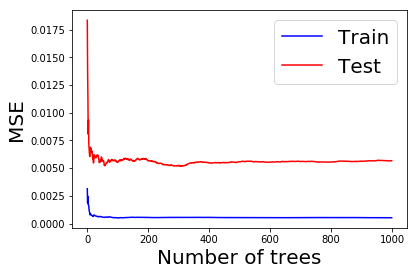

In [16]:
y=np.ravel(y_train)
numTrees=1000
mseTest=np.zeros(numTrees)
mseTrain=np.zeros(numTrees)

for i in range(0, numTrees):
    regr = RandomForestRegressor(random_state=3, n_estimators=i+1, max_features='sqrt')
#     regr = RandomForestRegressor(max_depth=6, random_state=1, n_estimators=i+1)
    regr.fit(X_train, y)  
    yPredTest = regr.predict(X_test)
    mseTest[i] = sklearn.metrics.mean_squared_error(y_test,yPredTest)

    yPredTrain = regr.predict(X_train)
    mseTrain[i] = sklearn.metrics.mean_squared_error(y_train,yPredTrain)

plt.plot(range(0, numTrees), mseTrain, color='b', label='Train')    
plt.plot(range(0, numTrees), mseTest, color='r', label='Test')    
plt.xlabel('Number of trees', fontsize=20)
plt.ylabel('MSE', fontsize=20)
plt.legend(prop={'size': 20})

pathRoot = 'C:/Users/linji/OneDrive - Umich/EECS545Fall2019/Project/randomForest/'
plt.savefig(pathRoot+'rfMSE')

In [8]:
print(regr.feature_importances_)
# print(np.argsort(regr.feature_importances_))
order = np.argsort(regr.feature_importances_)
order = np.flip(order)
print(order)

[0.21507059 0.09287705 0.03120901 0.06667219 0.02143817 0.01950296
 0.0957356  0.05587744 0.05280346 0.01690774 0.10189517 0.0666112
 0.09907249 0.03863258 0.02569435]
[ 0 10 12  6  1  3 11  7  8 13  2 14  4  5  9]


In [9]:
mseTrain[-1]

0.0005251370599441172

In [10]:
mseTest[-1]

0.005670246189535292

In [9]:
aaa=np.delete(X_array,0,1)
aaa.shape

(208, 14)

In [10]:
aaa

array([[-0.155, -0.055,  0.207, ..., -0.219,  0.019,  0.232],
       [-0.243,  0.193,  0.175, ...,  0.054,  0.172, -0.097],
       [ 0.007, -0.071,  0.072, ..., -0.057, -0.067,  0.026],
       ...,
       [-0.738,  0.592, -0.521, ..., -0.345, -0.101, -0.889],
       [-0.769,  0.612, -0.531, ..., -0.32 , -0.068, -0.889],
       [-0.753,  0.618, -0.515, ..., -0.309, -0.084, -0.874]])

In [13]:
y=np.ravel(y_train)
regr = RandomForestRegressor(max_depth=4, random_state=1,
                             n_estimators=200)
regr.fit(X_train, y)  

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=4,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
           oob_score=False, random_state=1, verbose=0, warm_start=False)

In [14]:
print(regr.feature_importances_)


[0.19578678 0.01091278 0.02105184 0.00814097 0.01287188 0.03172167
 0.0145678  0.01648086 0.00884103 0.24270152 0.0123846  0.37818869
 0.0250308  0.02131878]


In [5]:
yPred = regr.predict(X_test)
mse = sklearn.metrics.mean_squared_error(y_test,yPred)
print (mse)


0.008679484245170418


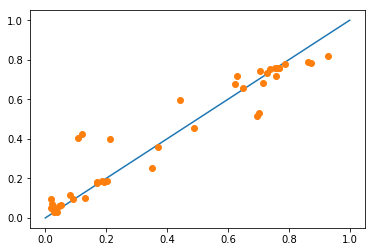

In [6]:
xx = np.linspace(0,1,100)
yy = np.linspace(0,1,100)
plt.clf()
plt.plot(xx,yy)
# plt.plot(y.numpy(), prediction.detach().numpy(), '.')
plt.plot(y_test, yPred, 'o')